# selector
- 인터넷을 하는 과정

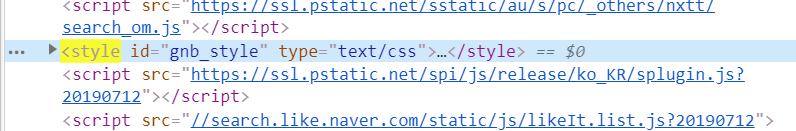

- css가 style을 control
- domtree와 style을 이용해서 

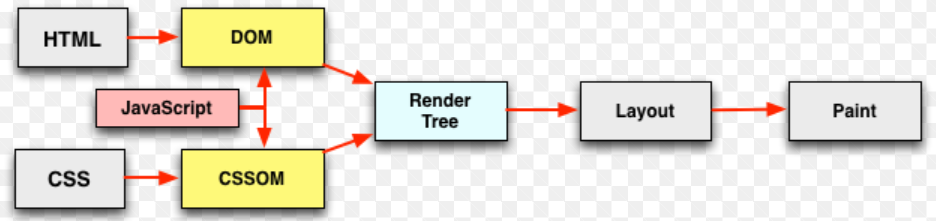

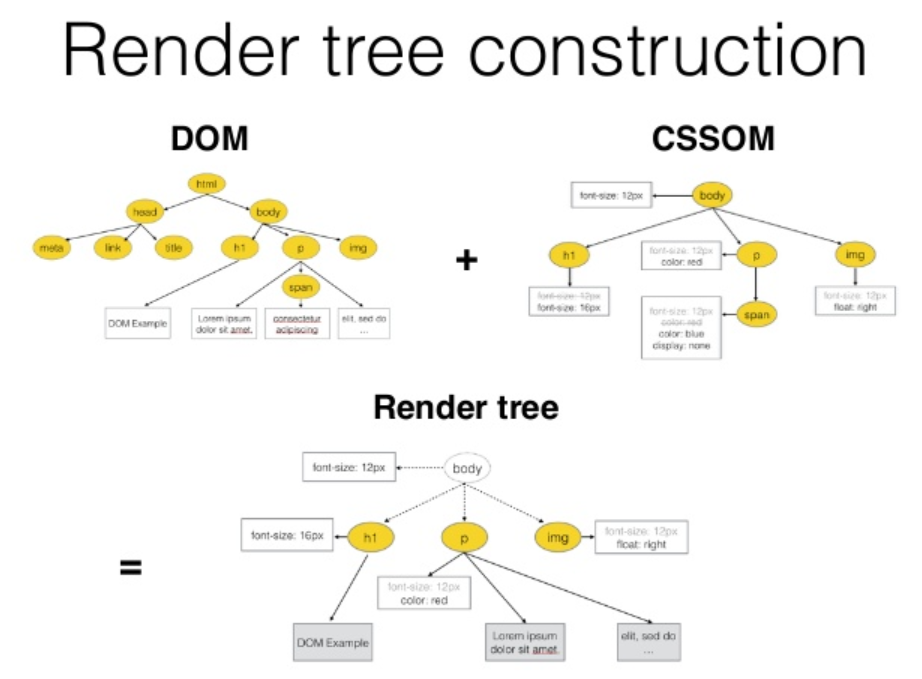

# CSS Selector

CSS(Cascading Style Sheets)는 HTML 요소(Element)의 style(design, layout etc)을 정의한다. 그리하려면 HTML이 존재하여야 하고 또한 style을 적용하고자하는 HTML 요소를 특정할 필요가 있다. 이러한 목적으로 사용되는 것이 셀렉터(Selector)이다. 즉, style을 적용하고자하는 HTML 요소를 셀렉터로 특정하고 선택된 요소에 스타일을 정의하는 것이다.
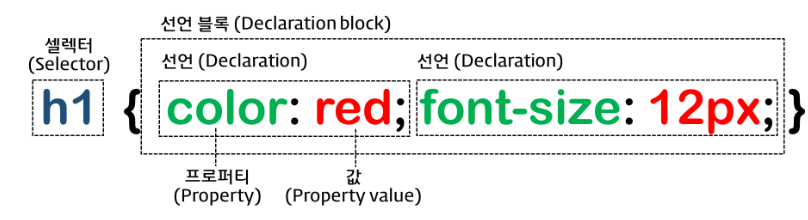


- id 값이 있으면 이를 이용해서 찾는다
- 못 찾으면 class를 이용한다

In [1]:
!pip install bs4

In [2]:
from bs4 import BeautifulSoup

In [7]:
html = """
<html>
 <head></head>
 <body> 
    <div id = "result">
         <p class = "row">
	<a class = "red">123</a>
    <a class = "blue">go to page 2</a>
    <div class = "blue"><a class = "red"></a></div>     
    <a class = "blue"> go to page 2</a>     
         </p>
    </div>
  </body>
  """

In [8]:
dom = BeautifulSoup(html, 'lxml')

In [9]:
# dom.select()
# 훨씬 더 졍교하게 찾아줘야 한다

dom. select()

ID => # 어쩌고

CLASS => .어쩌고

태그 => 태그

자손 => 공백

자식 => >

In [10]:
# div => 우리예에서 2개 찾아온다
selecetor("div") => 2
selecetor("div#result") => 1
selecetor("#result") => 1

SyntaxError: invalid syntax (<ipython-input-10-897f71754db4>, line 2)

In [27]:
def download(method,url,param=None,data=None,timeout=1,maxretries=3):#원래 header도 있어야된다. 위에 정의한거 쓸꺼야
  
    try:
        resp=requests.request(method,url,params=param,data=data,headers=headers)
        
        resp.raise_for_status()#강제로 에러를 내는 코드
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code<600 and maxretries>0:
            time.sleep(timeout)
            print("재시도")
            resp=download(method,url,param,data,timeout,maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp


# 구글에서 가져오기

In [28]:
import requests

In [32]:
from urllib import request
#urlopen은 http.client.HTTPResponse객체를 return함
resp= request.urlopen("http://www.google.com")

#geturl return the url of the resource retrieved
#info return the meta_info of the page
#getcode return the http status code of the response


In [37]:
from urllib import error
try:
    resp=request.urlopen("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")#hexaencoding되었다.여기에 한글쓰면 encodeerror
except error.HTTPError as e:
    print(e.code,e.reason,e.headers)
#우리는 e.code를 가지고 분기하면 된다. 400대면 뭐하고 500대면 기다렸다 하고.
#이거 해도 forbidden된다. 안된다. 즉, 봇인 것을 숨겨야 된다. 마치 내 컴퓨터에서 작업 한 것처럼 만든다.request헤더 보는 법 익히기
#봇의 헤더에다가 request 헤더를 심는다.

403 Forbidden Content-Type: text/html; charset=UTF-8
Date: Fri, 12 Jul 2019 08:03:11 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




In [53]:
type(Request)

NameError: name 'Request' is not defined

In [49]:
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
#request.urlopen()urlopen은 shift tab해도 헤더심을 수 있는 방법이 없다.
#request.Request()이건 headers{}가있다.

from urllib import error
try:
    req=request.Request("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81",headers=headers)
    #파라미터 를 param={}이렇게 따로 정의해서 따로 encode하고 data에 넣어주는 방법도잇다.
    resp=request.urlopen(req)
except error.HTTPError as e:
    print(e.code,e.reason,e.headers)
#어제는 header를 안넣어도 data사이트에서는 괜찮았다. 하지만 일반 크롤링은 header를 필요로 하기때문에 헤더를 심어줘야된다.

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>박보영 - Google 검색</title><script nonce="blqrWn/yjDKxG60kX3hhRw==">(function(){window.google={kEI:'Hj8oXe78KfyHr7wPtu-osAo',kEXPI:'31',authuser:0,kscs:'c9c918f0_Hj8oXe78KfyHr7wPtu-osAo',kGL:'KR'};google.sn='web';google.kHL='ko';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=google.li;d[f]
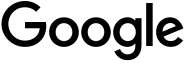
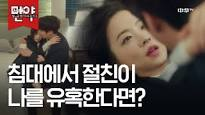
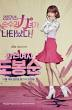
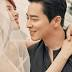

In [43]:
url = "https://www.google.com/search?"
params = {
    "hl": "ko",
    "source": "hp",
    "ei": "fOQnXdWBKIO88QXG3IuACg",
    "q": "박보영",
    "oq": "박보영"
}

html = download("get", url, param=params)
print(html.text)
dom = BeautifulSoup(html.text, "lxml")

In [44]:
[(_["href"], _.text)
for _ in dom.select(".rc > .r a[href^=http]")]

[('https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81',
  '박보영 - 나무위키https://namu.wiki/w/박보영'),
 ('https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81',
  '박보영 - 위키백과, 우리 모두의 백과사전https://ko.wikipedia.org/wiki/박보영'),
 ('https://webcache.googleusercontent.com/search?q=cache:gv9t4wBBoSMJ:https://ko.wikipedia.org/wiki/%25EB%25B0%2595%25EB%25B3%25B4%25EC%2598%2581+&cd=12&hl=ko&ct=clnk&gl=kr',
  '저장된\xa0페이지'),
 ('https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D',
  '박보영의 작품 목록 - 위키백과, 우리 모두의 백과사전https://ko.wikipedia.org/wiki/박보영의_작품_목록'),
 ('https://webcache.googleusercontent.com/search?q=cache:VhhxhBJ2kukJ:https://ko.wikipedia.org/wiki/%25EB%25B0%2595%25EB%25B3%25B4%25EC%2598%2581%25EC%259D%2598_%25EC%259E%2591%25ED%2592%2588_%25EB%25AA%25A9%25EB%25A1%259D+&cd=13&hl=ko&ct=clnk&gl=kr',
  '저장된\xa0페이지'),
 ('https://news.joins.com/article/22895953',
  '박보영은 오래 지켜본다. 연애도, 연기 변신도 - 중앙일보https://news.joins.com/article/22895953'),
 ('https:/

# 네이버에서 가져오기

In [62]:
url = "https://search.naver.com/search.naver?"
params = {

    "where" : "nexearch",
    "sm" : "tab_jum",
    "query": "슬기"

}


html = download("get", url, param=params)
print(html.text)
dom = BeautifulSoup(html.text, "lxml")

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="슬기 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'슬기'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'슬기'의 네이버 통합검색 결과입니다."> <title>슬기 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css"> <link rel="stylesheet" type="text/css" href="https://ss

In [63]:
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
#request.urlopen()urlopen은 shift tab해도 헤더심을 수 있는 방법이 없다.
#request.Request()이건 headers{}가있다.

from urllib import error
try:
    req=request.Request("https://search.naver.com/search.naver?where=nexearch&sm=tab_jum&query=%EC%8A%AC%EA%B8%B0",headers=headers)
    #파라미터 를 param={}이렇게 따로 정의해서 따로 encode하고 data에 넣어주는 방법도잇다.
    resp=request.urlopen(req)
except error.HTTPError as e:
    print(e.code,e.reason,e.headers)
#어제는 header를 안넣어도 data사이트에서는 괜찮았다. 하지만 일반 크롤링은 header를 필요로 하기때문에 헤더를 심어줘야된다.

In [65]:
[(_["href"], _.text)
for _ in dom.select("a[href^=http]")]

[('https://help.naver.com/support/alias/search/word/word_16.naver', '도움말 보기'),
 ('https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fwhere%3Dnexearch%26sm%3Dtab_jum%26query%3D%25EC%258A%25AC%25EA%25B8%25B0',
  '로그인'),
 ('https://help.naver.com/support/alias/search/word/word_16.naver', '자세히'),
 ('https://help.naver.com/support/alias/search/word/word_21.naver', '자세히'),
 ('https://help.naver.com/support/alias/search/word/word_17.naver', '도움말'),
 ('https://help.naver.com/support/alias/search/word/word_18.naver', '신고'),
 ('https://help.naver.com/support/alias/search/word/word_17.naver', '도움말'),
 ('https://help.naver.com/support/alias/search/word/word_18.naver', '신고'),
 ('https://help.naver.com/support/alias/search/word/word_17.naver', '도움말'),
 ('https://help.naver.com/support/alias/search/word/word_18.naver', '신고'),
 ('https://help.naver.com/support/alias/search/word/word_17.naver', '도움말'),
 ('https://help.naver.com/support/alias/search/word/word_18.nav